In [1]:
disp('hello from MATLAB')


hello from MATLAB


In [2]:
addpath(genpath('~/Documents/MATLAB/ImSAnE'))

In [3]:
% their data
scriptPath = '/Users/simonfreedman/Documents/MATLAB/ImSAnE/examples/DrosoEmbryo';
dataDir = fullfile(scriptPath, 'rawData');
projectDir = fullfile(scriptPath, 'projectFiles');

xp = project.Experiment(projectDir, dataDir);

In [4]:
fileMeta                 = struct();
fileMeta.dataDir         = dataDir;

%their data
fileMeta.filenameFormat  = 'Time%06d_8bit_bin2.tif'; % for full data sample use Time000000.tif
fileMeta.timePoints      = [5]; % for full data sample use 0;
fileMeta.stackResolution = [.5 .5 .5]; 


fileMeta.swapZT          = 0; % for full data sample use 1;
fileMeta.nChannels       = 1;

In [5]:
expMeta                  = struct();
expMeta.channelsUsed     = 1;
expMeta.channelColor     = 1;
expMeta.description      = 'BMP labeled plenaria'; %'GAP43-mCherry labeled fruitfly embryo';
expMeta.dynamicSurface   = 0;
expMeta.jitterCorrection = 0; % 1: Correct for sample translation
expMeta.fitTime          = fileMeta.timePoints(1); 
expMeta.detectorType     = 'surfaceDetection.fastCylinderDetector';%
expMeta.fitterType       = 'surfaceFitting.spherelikeFitter';

In [6]:
xp.setFileMeta(fileMeta);
xp.setExpMeta(expMeta);

xp.initNew();

Experiment.setFileMeta()
  fileMeta.directory not provided, stays the same
  fileMeta.series not provided, stays the same
  fileMeta.stackSize not provided, stays the same
  fileMeta.imageSpace not provided, stays the same
Experiment.setExpMeta()
> In project.Experiment/initNew (line 205)
Experiment.setDetectOptions()
Experiment.resetDetector():
Experiment.setFitOptions()
Experiment.resetFitter():
Experiment.setSOIOptions()
Experiment.resetFitter():
  resetFitter: setting fitOptions from experiment


In [7]:
xp.loadTime(5); %their data


................................................................................
................................................................................
................................................................................
................................................................................
...............................................
dt = 2.9628
Stack.setIntensityLimits()
  uint16


In [8]:
xp.rescaleStackToUnitAspect();

Rescaling stack to unit aspect ratio


In [9]:

myDetectOpts = struct('channel', 1, 'sigma', 1, 'ssfactor', 2, ...
    'nBins', 120,'rmRadialOutliers', 1, 'rmIntensityOutliers',1,...
    'zDim', 2);

In [10]:
xp.setDetectOptions(myDetectOpts);

Experiment.setDetectOptions()
Experiment.resetDetector():
  resetDetector: setting detectOptions from experiment


In [22]:
%xp.detectSurface();

In [21]:
%xp.stack.image.phi

In [12]:
inspectOptions= struct('dimension', 'y', 'value', 50, 'pointCloud', 'b');
%xp.detector.inspectQuality(inspectOptions, xp.stack);

In [13]:
ssfactor = 2;
%xp.detector.pointCloud.inspect(ssfactor);

In [14]:
xp.detector.pointCloud


ans = 

  PointCloud with properties:

             points: [38976x3 double]
                ROI: [1x1 surfaceDetection.RegionOfInterest]
    unalignedPoints: [38976x3 double]



In [3]:
% my data

scriptPath = '/Users/simonfreedman/cqub/plenaria';

dataDir    = fullfile(scriptPath, 'data');
projectDir = fullfile(scriptPath, 'surface_detect');

xp2=project.Experiment(projectDir, dataDir);

In [4]:
% my data
fileMeta2                 = struct();
fileMeta2.dataDir         = dataDir;
fileMeta2.filenameFormat  = 'BMP4_Tls__Day15_Control_w2_dorsal_14_w301 405.TIF';%  full data sample use Time000000.tif
fileMeta2.timePoints      = [0]; % for full data sample use 0;
fileMeta2.stackResolution = [0.9214 0.9214 2]; 
fileMeta2.nChannels = 1;
%fileMeta2.rawStackSize = [800 800 50 1];

expMeta = struct();
expMeta.description = 'Fixed worm [DAPI labeling nuclei]';
expMeta.channelsUsed = [1];
%expMeta.channelColor = [2 1 3];
expMeta.dynamicSurface = false;
expMeta.jitterCorrection = false;
expMeta.detectorType = 'surfaceDetection.planarEdgeDetector';
expMeta.fitterType = 'surfaceFitting.tpsFitter';


expMeta.fitTime          = fileMeta2.timePoints(1); 


In [5]:
xp2.setFileMeta(fileMeta2);
xp2.setExpMeta(expMeta);
xp2.initNew();

Experiment.setFileMeta()
  fileMeta.directory not provided, stays the same
  fileMeta.series not provided, stays the same
  fileMeta.stackSize not provided, stays the same
  fileMeta.imageSpace not provided, stays the same
  fileMeta.swapZT not provided, stays the same
Experiment.setExpMeta()
expMeta.channelColor not provided, stays the same
> In project.Experiment/initNew (line 205)
Experiment.setDetectOptions()
Experiment.resetDetector():
Experiment.setFitOptions()
Experiment.resetFitter():
Experiment.setSOIOptions()
Experiment.resetFitter():
  resetFitter: setting fitOptions from experiment


In [6]:
%setFileMeta(xp2,fileMeta2);

In [7]:
xp2.loadTime(0);

................................................................................
............
dt = 2.7016
Stack.setIntensityLimits()
  uint16


In [8]:
%mystack=xp2.stack.image.phi{1};

In [9]:
xp2.rescaleStackToUnitAspect();

Rescaling stack to unit aspect ratio
  Channel 1
Elapsed time is 3.632136 seconds.
Stack.setIntensityLimits()
  uint16


In [10]:
xp2.stack.imageSize


ans =

        1392        1040         198



In [136]:
%isequal(xp2.stack.getSlice('z',2),xp2.stack.getSlice('z',3))

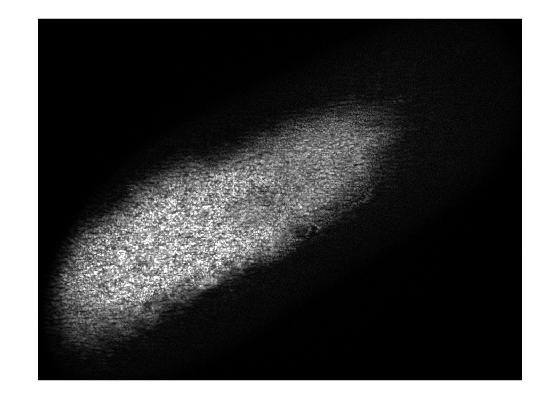

In [62]:
%% 
% xp.stack is not an array but a Stack object.
% The easy way to look at a slice through the data is using getSlice.

imshow(xp2.stack.getSlice('z', 50), []);

In [27]:
% %% Mask data
% %
% % Detection speed depends on stack size. We can speed it up by some basic
% % masking. Masking out unwanted information can also improve detection and
% % fitting.
% % Here this is not really necessary and we only do it to demonstrate the 
% % functionality, as this dataset has already been cropped to meet maximal
% % download size requirements.
% % Rather than creating 3D masks, we create 2D masks that are applied to
% % each cross section. In this case we simply cut out the bottom half of the
% % stack because we want to detect the top of the wing. We are doing this in
% % cross section normal to the y direction. 

% projectionMask = cell([3 1]);
% projectionMask{2} = true([xp2.stack.imageSize(1) xp2.stack.imageSize(3)]);
% projectionMask{2}(:, 130:end) = false;

% xp2.stack.setProjectionMask(projectionMask);

% imshow(xp2.stack.getSlice('y', 500), []);


In [11]:
%% Detect the surface
%
% planarDetector.detectSurface detects the surface as the position of the 
% maximal Gaussian z-derivative in some direction, i.e. the position of the
% largest intensity jump along some direction and smoothened over some
% scale.
%
% A number of detection options directly affect detection:
%
% * sigma :     Width of the Gaussian z-derivative.
% * channels :  Channels (summed) to use for detection.
% * zdir :      Dimension corresponding to z, minus flips direction.
% Flipping the direction can sometimes improve detection.
%
% Then there are options which filter the result and can be modified
% without redetecting:
%
% * maxIthresh:     Throw out points with MIP dimmer than this.
% * summedIthresh:  Throw out points with SIP dimmer than this.
% * sigZoutliers:   Remove height outliers after all other masks.
% * scaleZoutliers: Spatial scale of outlier removal.
%
% scaleZoutliers is the linear size of a region over which the
% distribution of height is computed, sigZoutliers is then a cutoff in
% units of standard deviation of this distribution to remove misdetected
% points far above or below the other points in the region.

detectOptions = xp2.detector.defaultOptions;
detectOptions.sigma = 3.5;
detectOptions.zdir = -3;
detectOptions.maxIthresh = 0.02;

In [12]:
%data=xp2.SOI.getField('data');

In [13]:
%pbcomp = data(1).getPatch('xy_index').getTransform('xy').apply();

In [14]:
% I think there must be a function that, if I provide the indices of two pixels, will spit out the distance between them
% but i can't find it here
% so, ugh
% also they keep talking about pullbacks
% wtf is a pullback


In [15]:
% Calling detectSurface runs the surface detector and creates the point
% cloud in detector.pointCloud.

xp2.setDetectOptions(detectOptions);
xp2.detectSurface();


Experiment.setDetectOptions()
Experiment.resetDetector():
  resetDetector: setting detectOptions from experiment
  Edge detection:   dt = 22.7005 sec
  Detecting point cloud,   dt = 2.8128 sec


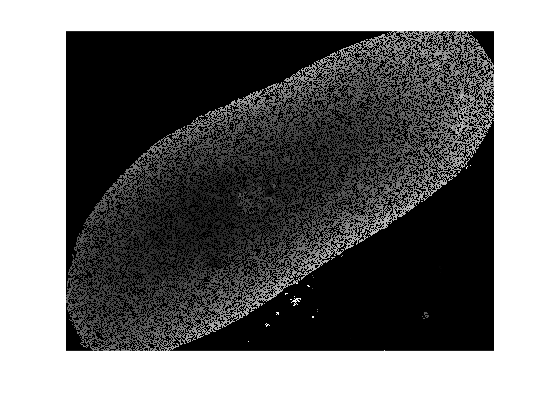

In [24]:
%%
% Different from the other detectors, the detected surface is
% represented not only by a PointCloud object but also by an image
% surfaceMatrix, containing z values for each xy.
% Looking at this height map masked by the filters specified in
% detectOptions one can judge how well the surface was detected.

imshow(xp2.detector.mask.*xp2.detector.surfaceMatrix, [],...
                                            'InitialMagnification', 50);

In [107]:
sum(xp2.detector.mask,'all')


ans =

      490496



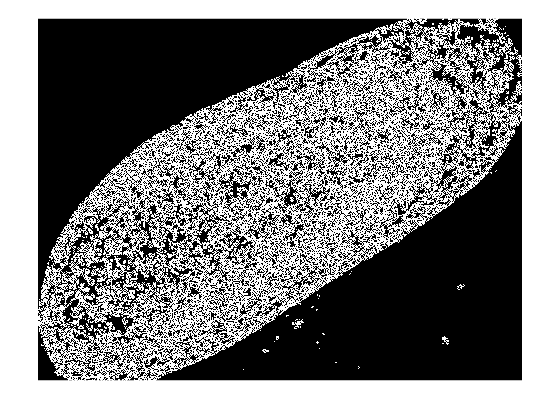

In [261]:
imshow(xp2.detector.mask)

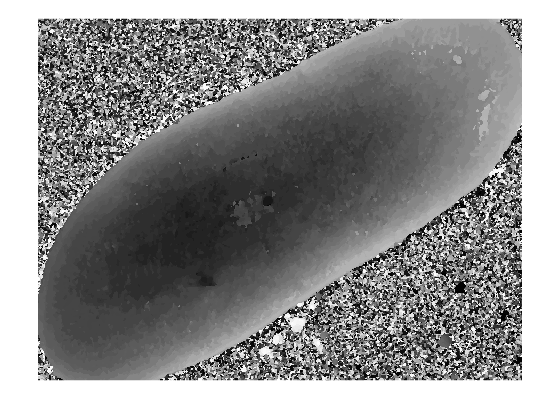

In [263]:
imshow(xp2.detector.surfaceMatrix/911)

In [224]:
min(reshape(xp2.detector.mask,[],1))


ans =

  logical

   0



In [227]:
methods(xp2.detector)


Methods for class surfaceDetection.planarEdgeDetector:

applyMasks              resetMask               updatePointCloud        
detectSurface           setManualMask           
inspectQuality          setOptions              
planarEdgeDetector      storeQualityInspection  

Call "methods('handle')" for methods of surfaceDetection.planarEdgeDetector inherited from handle.



In [260]:
size(xp2.detector.mask)


ans =

        1040        1392



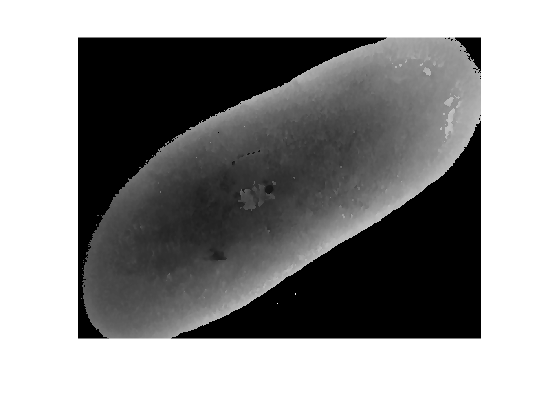

In [79]:
%% 
% One can then find better filter parameters without redetecting the
% surface by changing the second block of options in detectOptions and 
% calling resetMask and applyMasks. 

xp2.detector.resetMask();

detectOptions.maxIthresh = 0.1; 
detectOptions.sigZoutliers = 10; 
detectOptions.scaleZoutliers = 30; 

xp2.detector.setOptions(detectOptions);    
xp2.detector.applyMasks();

imshow(xp2.detector.mask.*xp2.detector.surfaceMatrix, [],...
                                            'InitialMagnification', 40);

In [80]:
surf = xp2.detector.mask.*xp2.detector.surfaceMatrix;

In [81]:
origin = [900 40];
totalMass = sum(surf,'all');

In [82]:
[nrow ncol] = size(xp2.detector.mask);
%nrow = 500;
%ncol = 800;
distsFromOrigin = NaN(nrow,ncol);
%for x in 1: 

In [25]:
fitOptions = struct('smoothing', 500, 'gridSize', [50 50]);
xp2.setFitOptions(fitOptions);
xp2.fitSurface();

Experiment.setFitOptions()
fitOptions.shift not provided, stays the same
fitOptions.normEvolveSS not provided, stays the same
fitOptions.fitMask not provided, stays the same
Experiment.resetFitter():
  resetFitter: setting fitOptions from experiment
  resetFitter: setting SOIOptions from experiment
surfaceFitter.setDesiredChart()
  Fitting thin plate spline
Ngrid =

    50    50

  dt = 4.9233 sec
  generating xy embedding
Map.compose():   numeric


In [26]:
%%
% We now generate the Surface Of Interest. The charts to be generated are 
% specified in xp.fitter.charts. In this case there is only one, called
% 'xy'. 

xp2.generateSOI();

  generating xy chart
  generating xy embedding
Map.compose():   numeric
  Atlas.getChartIndex: atlas contains no charts


In [27]:
columnarSOI = xp2.SOI;

  NCalcInducedMetric: static SOI: ignoring time argumentCoordinateMap.getJacobian()
TODO: Jacobian index type determination is primitive:
TODO: check matrix inverse index type
Contracting [-1] index 2 of du with [1] index 1 of dup_inverse
Contracting [0] index 1 of du_dup_inverse_2-1 with [0] index 1 of du_dup_inverse_2-1
  NCalcInducedMetric: patch exists -> transformMap.compose():   numeric
overwriting defining rep
TODO: check matrix inverse index type
Contracting [-1] index 1 of curvature with [1] index 1 of metric_inverse
  NCalcCurvature: patch xy_index exists -> transform xy
overwriting defining rep


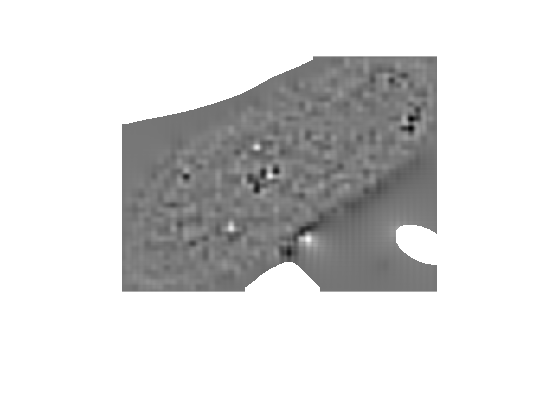

In [32]:
xp2.SOI.NCalcInducedMetric('xy');
xp2.SOI.NCalcCurvature('xy');

H = xp2.SOI.getField('curvature').getPatch('xy_index').trace().apply{1};

sigma = 10;
H = mat2gray(imfilter(H, fspecial('gaussian', 3*sigma, sigma)));
imshow(H, [], 'InitialMagnification', 20)

In [33]:
highCurv =  H < 0.4;
curvMask = ~highCurv;
curvMask = imerode(curvMask, strel('disk', 45));

xp2.detector.setManualMask(curvMask);
xp2.detector.applyMasks();

In [34]:
xp2.detector.inspectQuality(inspectOptions, xp2.stack);

Error using eval
Undefined function or variable 'inspectOptions'.



In [20]:
xp2.SOI.NCalcCurvature([100,100])

Error using diffgeometry.Manifold2D/NCalcCurvature (line 765)
chart is not in atlas



In [153]:
curve=[788 52; 800 52; 800 55];
gti=1;
chartName='xy';
xp2.SOI.properLength(1,curve,'xy')

getTranform returning defining rep

ans =

   16.1096



In [162]:
chart     = xp2.SOI.atlas(1).getChart('xy');
stepSize  = chart.image.stepSize;
u = curve;
ushift = circshift(u, [1 0]);
du = ushift - u;
% if the curve is not closed, the first entry will be the
% distance between beginning and end, Remove this contribution
% by setting it to 0.
du(1,:) = 0*du(1,:); 

% correction by stepSize;
du = [du(:,1)*stepSize(1),du(:,2)*stepSize(2)];

In [215]:
xp2.stack


ans = 

  Stack with properties:

             image: [1x1 diffgeometry.Map]
        resolution: [0.9214 0.9214 0.9214]
       description: 'Fixed worm [DAPI labeling nuclei]'
      channelColor: []
              Ilim: {[17 2772]}
    projectionMask: {3x1 cell}
            aspect: 1
         imageSize: [1392 1040 198]



In [169]:
domName = xp2.SOI.atlas(gti).getChart(chartName).domain.name;
g = xp2.SOI.g(gti).getPatch(domName).getTransform(chartName);
%gcurve = g.apply({u(:,1),u(:,2)});
metric    = g.apply();
gcurve{1,1} = interp2(metric{1,1},u(:,1),u(:,2));
gcurve{1,2} = interp2(metric{1,2},u(:,1),u(:,2));
gcurve{2,1} = interp2(metric{2,1},u(:,1),u(:,2));
gcurve{2,2} = interp2(metric{2,2},u(:,1),u(:,2));

dlsq = du(:,1).*(gcurve{1,1}.*du(:,1) + gcurve{1,2}.*du(:,2))...
      +du(:,2).*(gcurve{2,1}.*du(:,1) + gcurve{2,2}.*du(:,2));
lproper = sum(sqrt(dlsq));

getTranform returning defining rep


In [192]:
dlsq,lproper


dlsq =

         0
  157.2366
   12.7460


lproper =

   16.1096



In [179]:
interp2(metric{1,1},u(:,1),u(:,2))


ans =

    1.0889
    1.0919
    1.0938



In [189]:
metric{1,1}(u(:,1))


ans =

    1.0935
    1.1092
    1.1092



In [183]:
u(1,:)


ans =

   788    52



In [180]:
u(:,1)


ans =

   788
   800
   800



In [177]:
metric


metric =

  2x2 cell array

    {1040x1392 double}    {1040x1392 double}
    {1040x1392 double}    {1040x1392 double}



In [175]:
gcurve{1,2}


ans =

    0.1859
    0.1925
    0.1976



In [170]:
lproper


lproper =

   16.1096



In [166]:
isempty(xp2.SOI.g(1).patches)


ans =

  logical

   0



In [165]:
if isempty(xp2.g(1).patches)
    this.NCalcInducedMetric(time);
end


ans =

     3     2


ans =

     3     2



In [155]:
circshift(curve,[1 0])


ans =

   800    55
   788    52
   800    52



In [154]:
circshift(curve,[1 0])-curve


ans =

    12     3
   -12     0
     0    -3



In [159]:
curve(1:2,:)-curve(2:3,:)


ans =

   -12     0
     0    -3



In [144]:
chart = xp2.SOI.atlas(1).getChart('xy')


chart = 

  CoordinateMap with properties:

            domain: [1x1 diffgeometry.FiniteSet]
             image: [1x1 diffgeometry.FiniteSet]
       subSampling: 1
            ssZero: 1
               phi: {1x2 cell}
    representation: 'analytic'
           phiSize: [1 2]



In [37]:
if xp2.detector.mask(900,40)
disp('hello')
else
disp('bye')
end

hello


In [38]:
xp2.detector.mask(800,800)


ans =

  logical

   0



In [45]:
i=5;
j=10;
curve=[800 53; 800 52]; %[origin; i j]
xp2.SOI.properLength(1,curve,'xy')

Dot indexing is not supported for variables of this type.



In [46]:
xp2.detector.surfaceMatrix


ans =

     []



In [47]:
hts    = xp2.detector.mask.*xp2.detector.surfaceMatrix;

In [48]:
ms = xp2.detector.summedI.*xp2.detector.mask;

In [49]:
ncol = 5;
nrow = 8;
[nrow ncol] = size(xp2.detector.mask);
xs = repmat(1:nrow, ncol,1).';
ys = repmat(1:ncol, nrow,1);


In [50]:
cm = [sum(ms.*xs,'all'),sum(ms.*ys,'all'),sum(ms.*hts,'all')]/sum(ms,'all');

In [51]:
xssq = xs.^2;
yssq = ys.^2;
zssq = hts.^2;

moixx = sum(ms.*(yssq + zssq),'all');
moiyy = sum(ms.*(xssq + zssq),'all');
moizz = sum(ms.*(xssq + yssq),'all');
moixy = sum(-ms.*xs.*ys,'all');
moixz = sum(-ms.*xs.*hts,'all');
moiyz = sum(-ms.*ys.*hts,'all');

moi = [moixx moixy moixz; moixy moiyy, moiyz; moixz moiyz, moizz];

In [52]:
[paxes szs] = eig(moi);

In [53]:
magic(3)


ans =

     8     1     6
     3     5     7
     4     9     2



In [521]:
hts2 = zeros(nrow,ncol);
for i=1:nrow
for j=1:ncol
hts2(i,j)=hts(xs(i,j),ys(i,j));
end
end

In [522]:
isequal(hts2,hts)


ans =

  logical

   1



In [491]:
hts2


hts2 =

     0     0     0     0     0
     0     0     0     0     0
     0     0     0     0     0
     0     0     0     0     0
     0     0     0     0     0
     0     0     0     0     0
     0     0     0     0     0
     0     0     0     0     0



In [470]:
cm = [0 0 0]
for i=1:nrow
    for j=1:ncol
        if xp2.detector.mask(i,j)
            k = xp2.detector.surfaceMatrix(i,j);
            m = xp2.detector.summedI(i,j);
            cm = cm + m*[i j k];
            %distsFromOrigin(i,j)= xp2.SOI.properLength(1,[origin; i j],'xy');
        end
    end
end

In [471]:
cm


cm =

   1.0e+14 *

    1.6367    2.3766    1.0668



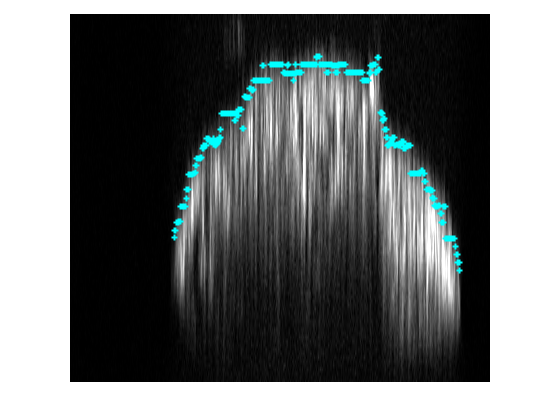

In [134]:
%%
% We can also inspect a point cloud cross section over the data with
% detector.inspectQuality. In the pointCloud option, 'c' specifies the 
% color cyan.

inspectOptions= struct('dimension', 'x', 'value', 500, 'pointCloud', 'c');
xp2.detector.inspectQuality(inspectOptions, xp2.stack);

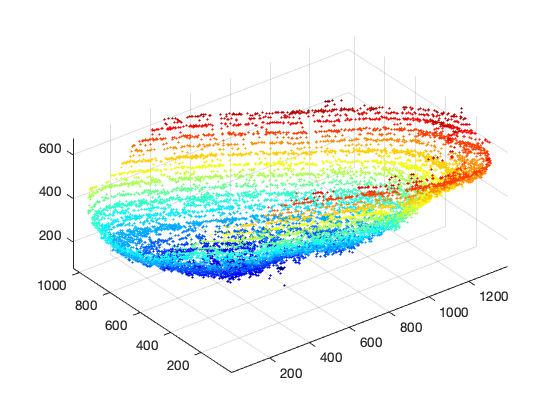

In [131]:
ssfactor = 50;
xp2.detector.pointCloud.inspect(ssfactor);


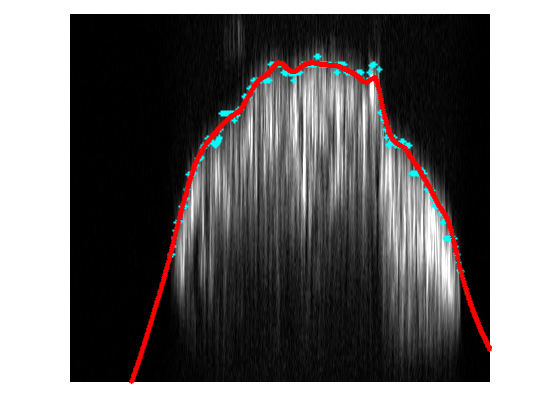

In [268]:
%%
% We can visualize the result on a cross section with
% fitter.inspectQuality.

xp2.fitter.inspectQuality(inspectOptions, xp2.detector, xp2.stack);


In [ ]:
fitter

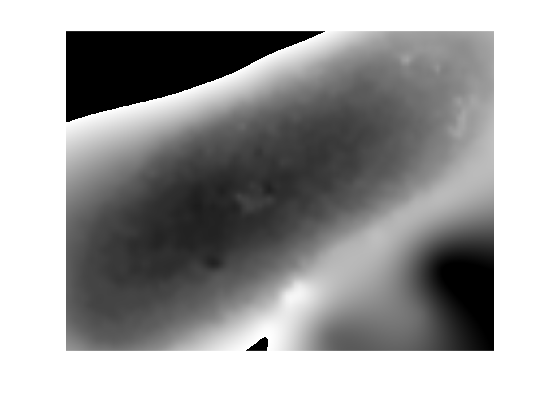

In [281]:
imshow(xp2.fitter.fittedPoints{1,3}/1000, [],...
                                            'InitialMagnification', 50);

In [280]:
size(xp2.fitter.fittedPoints{1,3})


ans =

        1040        1392



bla
  generating xy embedding
Map.compose():   numeric


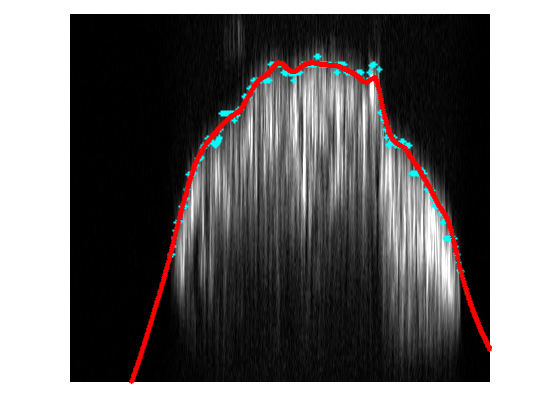

In [274]:
%%
% The detector picks up the edge of the E-cad signal but the best read out
% goes solidly through it so we want to move the surface down a little. For
% this we use zEvolve, with a shift specified in pixels.

shift = -200;
xp2.zEvolve(shift);
%inspectOptions= struct('dimension', 'x', 'value', 500, 'pointCloud', 'c');

xp2.fitter.inspectQuality(inspectOptions, xp2.detector, xp2.stack);

  generating xy chart
  generating xy embedding
Map.compose():   numeric
  Atlas.getChartIndex: atlas contains no charts


In [145]:
help(xp2)

--- help for project.Experiment ---

 classdef Experiment < handle_light

    Reference page in Doc Center
       doc project.Experiment




In [223]:
onion=struct();
onion.nLayers=21;
onion.layerDistance=1;


In [224]:
xp2.SOI.pullbackStack(xp2.stack,xp2.currentROI,xp2.currentTime)

Map.compose():   numeric
  AffineMap constructor called with non-matrix argument,trying CoordinateMap constructor
  Pulling back stack to chart xy
Map.compose():   numeric
  AffineMap constructor called with non-matrix argument,trying CoordinateMap constructor
Map.compose():   numeric
  pulling back data
  field already defined on xy_index adding it as transformation
overwriting defining rep


In [225]:
%% Pull back the data to the surface
% 
% We pull back the data to the SOI using pullbackStack.

% ... how is this different from the surface

xp2.SOI.pullbackStack(xp2.stack, xp2.currentROI, xp2.currentTime,onion);

Map.compose():   numeric
  AffineMap constructor called with non-matrix argument,trying CoordinateMap constructor
  Pulling back stack to chart xy
Map.compose():   numeric
  AffineMap constructor called with non-matrix argument,trying CoordinateMap constructor
Map.compose():   numeric
  pulling back data_layer_m10
Map.compose():   numeric
  pulling back data_layer_m9
Map.compose():   numeric
  pulling back data_layer_m8
Map.compose():   numeric
  pulling back data_layer_m7
Map.compose():   numeric
  pulling back data_layer_m6
Map.compose():   numeric
  pulling back data_layer_m5
Map.compose():   numeric
  pulling back data_layer_m4
Map.compose():   numeric
  pulling back data_layer_m3
Map.compose():   numeric
  pulling back data_layer_m2
Map.compose():   numeric
  pulling back data_layer_m1
Map.compose():   numeric
  pulling back data
  field already defined on xy_index adding it as transformation
overwriting defining rep
Map.compose():   numeric
  pulling back data_layer_p1
Map.compos

In [ ]:
% could i pull back the BMP stack onto the DAPI ROI?
% what's the diff between ROI and SOI?

In [434]:
curve=[800 52; 800 53];
gti=1;
chartName='xy';
xp2.SOI.properLength(1,curve,'xy')

getTranform returning defining rep

ans =

    2.5225



In [217]:
xp2.SOI


ans = 

  SurfaceOfInterest with properties:

                data: [1x1 diffgeometry.Field]
             nLayers: 3
               atlas: [1x1 diffgeometry.Atlas]
              fields: {1x3 cell}
    topologicalSpace: [1x1 diffgeometry.TopologicalSpace]
             dynamic: 0
          timePoints: 0
                   g: [1x1 diffgeometry.Field]
           embedding: [1x1 diffgeometry.Field]
         nTimePoints: 1



In [374]:
u = curve;
ushift = circshift(u, [1 0]);
du = ushift - u;
% if the curve is not closed, the first entry will be the
% distance between beginning and end, Remove this contribution
% by setting it to 0.
du(1,:) = 0*du(1,:); 

% correction by stepSize;
du = [du(:,1)*stepSize(1),du(:,2)*stepSize(2)];

if isempty(xp2.SOI.g(gti).patches)
    xp2.SOI.NCalcInducedMetric(time);
end

domName = xp2.SOI.atlas(gti).getChart(chartName).domain.name;
g = xp2.SOI.g(gti).getPatch(domName).getTransform(chartName);
%gcurve = g.apply({u(:,1),u(:,2)});
metric    = g.apply();
gcurve{1,1} = interp2(metric{1,1},u(:,1),u(:,2));
gcurve{1,2} = interp2(metric{1,2},u(:,1),u(:,2));
gcurve{2,1} = interp2(metric{2,1},u(:,1),u(:,2));
gcurve{2,2} = interp2(metric{2,2},u(:,1),u(:,2));

dlsq = du(:,1).*(gcurve{1,1}.*du(:,1) + gcurve{1,2}.*du(:,2))...
      +du(:,2).*(gcurve{2,1}.*du(:,1) + gcurve{2,2}.*du(:,2));
lproper = sum(sqrt(dlsq));

getTranform returning defining rep


In [379]:
du = ushift - u;
du(1,:) = 0*du(1,:); 
du = [du(:,1)*stepSize(1),du(:,2)*stepSize(2)];
du


du =

     0     0
     0    -1



In [388]:
domName


domName =

    'xy_index'



In [307]:
chart     = xp2.SOI.atlas(1).getChart('xy');

In [308]:
 stepSize  = chart.image.stepSize;

In [226]:
%%
% To look at the pullback, we call the data field of the SOI at the right
% time, and get a particular patch from that with getPatch. A patch is a 
% part of a surface. In this case, there is only one called xy_index.
% Then we get the data in some patch in a particular coordinate system with
% getTransform. In this case there is only one coordinate system: xy.
% What we get is an object not only holding the image data but also
% metadata and methods to manipulate it. The actual data is obtained by
% calling the method apply. This returns a cell array with entries for each
% channel.

% xp.tIdx converts the time into an index in a list of time points
tidx = xp2.tIdx(0);

In [250]:
dpi=xp2.SOI.data(1).getPatch('xy_index').getTransform('xy').apply();

getTranform returning defining rep


In [277]:
xp2.SOI.g


ans = 

  Field with properties:

           name: 'metric'
       topology: [1x1 diffgeometry.TopologicalSpace]
        patches: {[1x1 diffgeometry.SquareTensorPatch]}
    targetSpace: [1x1 diffgeometry.Set]
     patchClass: 'diffgeometry.SquareTensorPatch'



In [257]:
size(dpi{1,1,1})


ans =

        1040        1392



In [246]:
z=xp2.SOI.data(1).getPatch('xy_index').getTransform('xy').apply{1};

In [308]:
data = xp2.SOI.getField('data_layer_m5');
data = data(1);
pb = data.getPatch('xy_index').getTransform('xy').apply{1};

getTranform returning defining rep


In [306]:
data = xp2.SOI.getField('data_layer_m5')(1);
pb = data.getPatch('xy_index').getTransform('xy').apply{1};

Error: ()-indexing must appear last in an index expression.



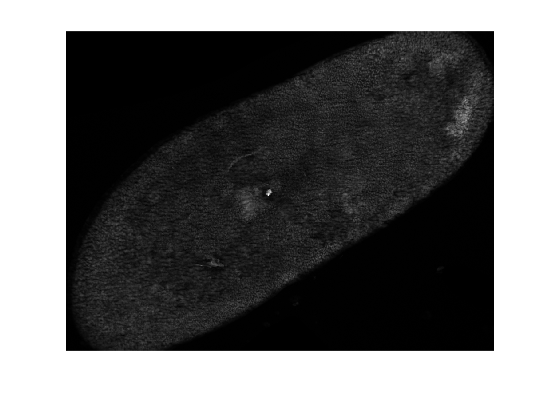

In [302]:
% the first channel is DAPI (?)
%channel = 1;

%discProperPatch = xp2.SOI.data(tidx).getPatch('xy_index');
%discProperImage = discProperPatch.getTransform('xy').apply{channel};
figure, imshow(pb, [], 'InitialMagnification', 50);

In [ ]:
discProperPatch.

In [142]:
scriptPath


scriptPath =

    '/Users/simonfreedman/cqub/plenaria'



In [143]:
%% Save the result
%
% Finally we save the SOI using SOI.save. We set the following options:
%
% * dir:            The directory to save the SOI to.
% * imwriteOptions: Pullbacks are saved to image files using imwrite, we
% can pass options to change file format, compression etc. For example we
% could change this option to
% imwriteOptions = {'jp2', 'Mode', 'lossless'}; 
% * make8bit:       Often absolute intensities don't matter and 8 bit offers
% a large enough dynamic range. This options rescales the lookup table and
% converts to 8 bit before saving.

imwriteOptions = {'tif', 'Compression', 'deflate'};
savedir = fullfile(scriptPath, 'wormDorsalSOI');

options = struct(   'dir',              savedir,...
                    'imwriteOptions',   {imwriteOptions},...
                    'make8bit',         true);
xp2.SOI.save(options)

%%
% All metadata is saved in SOI.xml. Pullbacks, geometry and any other data
% defined on the surface are saved to image files in subdirectories 
% reflecting the structure of patches and coordinates explained earlier in 
% this tutorial. We can reload a surface of interest with
% SOI.load(directory)

created dir /Users/simonfreedman/cqub/plenaria/wormDorsalSOISaving atlas
  Map: subSampling 2 from definition struct
created dir /Users/simonfreedman/cqub/plenaria/wormDorsalSOI/atlas/charts/xy
Saving topology
Saving fields
  embedding
  Map: subSampling 2 from definition struct
  data
created dir /Users/simonfreedman/cqub/plenaria/wormDorsalSOI/fields/data/xy_index/xy


In [392]:
% load the BMP surface
% my data
fileMetaB                 = struct();
fileMetaB.dataDir         = dataDir;
fileMetaB.filenameFormat  = 'BMP4_Tls__Day15_Control_w2_dorsal_14_w203 Cy3.TIF'; %  full data sample use Time000000.tif
fileMetaB.timePoints      = [0]; % for full data sample use 0;
fileMetaB.stackResolution = [1 1 10]; 
fileMetaB.nChannels = 1;
%fileMeta2.rawStackSize = [800 800 50 1];

expMetaB = struct();
expMetaB.description = 'Fixed worm [DAPI labeling nuclei]';
expMetaB.channelsUsed = [1];
%expMeta.channelColor = [2 1 3];
expMetaB.dynamicSurface = false;
expMetaB.jitterCorrection = false;
expMetaB.detectorType = 'surfaceDetection.planarEdgeDetector';
expMetaB.fitterType = 'surfaceFitting.tpsFitter';


expMetaB.fitTime          = fileMeta2.timePoints(1); 


xpB=project.Experiment(projectDir, dataDir);
xpB.setFileMeta(fileMetaB);
xpB.setExpMeta(expMeta);
xpB.initNew();

Experiment.setFileMeta()
  fileMeta.directory not provided, stays the same
  fileMeta.series not provided, stays the same
  fileMeta.stackSize not provided, stays the same
  fileMeta.imageSpace not provided, stays the same
  fileMeta.swapZT not provided, stays the same
Experiment.setExpMeta()
expMeta.channelColor not provided, stays the same
> In project.Experiment/initNew (line 205)
Experiment.setDetectOptions()
Experiment.resetDetector():
Experiment.setFitOptions()
Experiment.resetFitter():
Experiment.setSOIOptions()
Experiment.resetFitter():
  resetFitter: setting fitOptions from experiment


In [26]:
% this onward is for cylindrical surface

myDetectOpts = struct('channel', 1, 'sigma', 10, 'ssfactor', 4, ...
    'nBins', 180,'rmRadialOutliers', 1000, 'rmIntensityOutliers',1000,...
    'zDim', 2);
xp2.setDetectOptions(myDetectOpts);
xp2.detectSurface();

Experiment.setDetectOptions()
Experiment.resetDetector():
  resetDetector: setting detectOptions from experiment
fastCylinder.detectSurface() : channel=1, sigma=10, ssfactor=4, zDim=2, rmRadialOutliers=1000, rmIntensityOutliers=1000
  Edge detection:   cylindrical radial derivative  dt = 2.2921 sec
  Detecting point cloud,   dt = 5.619 secs
  setting ROI alignment based on zDim


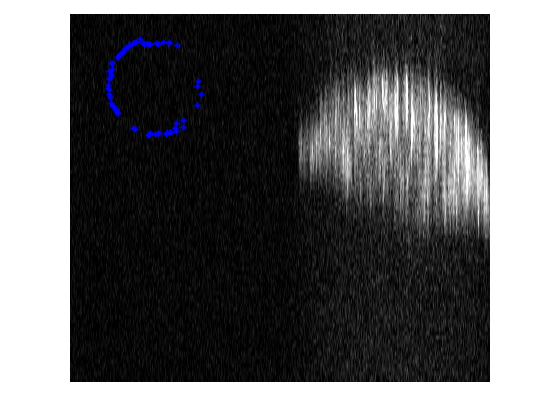

In [31]:
inspectOptions= struct('dimension', 'x', 'value', 100, 'pointCloud', 'b');
xp.detector.inspectQuality(inspectOptions, xp2.stack);